In [18]:
import numpy as np
from scipy import linalg

### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Не имею ни малейшего представления, что я должен тут делать. Сидеть далее над этим заданием не могу - я и так потратил на него непропорционально много времени.

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [3]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [19]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719 -0.70710678]
Собственное значение 4.0
соответствующий ему собственный вектор [ 0.4472136  -0.70710678]


Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [20]:
m1 = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m1)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


In [21]:
w, v = np.linalg.eig(m1)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 2.999999999999999
соответствующий ему собственный вектор [-0.81649658  0.57735027 -0.27658128]
Собственное значение 5.999999999999997
соответствующий ему собственный вектор [0.40824829 0.57735027 0.8035929 ]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор [-0.40824829 -0.57735027  0.52701162]


### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [22]:
m2 = np.array([[1, 2],
              [2,3]])
print(m2)

[[1 2]
 [2 3]]


In [23]:
a, U = linalg.eig(m2)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798+0.j  4.23606798+0.j]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [24]:
print(U * np.diag(a) * U.T)

[[-0.17082039+0.j -0.        +0.j]
 [-0.        +0.j  3.06524758-0.j]]


### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [35]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [36]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [37]:
X, y = load_digits(return_X_y=True)

In [51]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


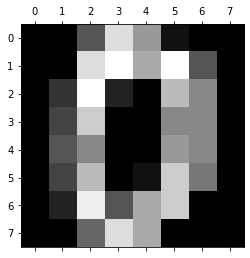

In [52]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [53]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668985154658

In [54]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.8041179744017808

In [100]:
components = []
oob_score = []
for i in range (1,64):
    svd = TruncatedSVD(n_components=i)
    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    components.append(i)
    oob_score.append(rf_reduced.oob_score_)

Text(0, 0.5, 'oob_score')

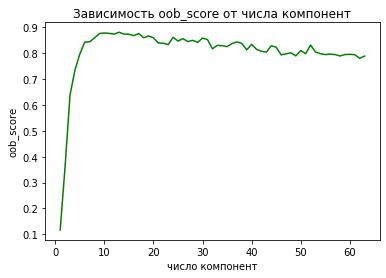

In [113]:
plt.title('Зависимость oob_score от числа компонент')
plt.plot(components, oob_score, color = 'g')
plt.xlabel('число компонент')
plt.ylabel('oob_score')